# Moj rad

In [2]:
from __future__ import print_function
#import potrebnih biblioteka
import cv2
import collections

# keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from keras.models import model_from_json

#Sklearn biblioteka sa implementiranim K-means algoritmom
from sklearn import datasets
from sklearn.cluster import KMeans

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 160, 141 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno

from pocetak import *
from services.preparation_for_neural_network import *
from services.show_result import *
from debug_helper.helper import *

In [3]:
image_path0 = 'dataset/train/alphabet1.png'
letters0 = load_image_and_find_roi_HSV_TRAIN(image_path0)
alphabet0 = ['A', 'B', 'C', 'Č', 'Ć', 'D', 'E', 'F', 'G', 'H','I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S','Š', 'T', 'U','V', 'W', 'X', 'Y', 'Z', 'Ž']

image_path1 = 'dataset/train/alphabet1.png'
letters1 = load_image_and_find_roi_HSV_TRAIN(image_path1)
alphabet1 = ['a', 'b', 'c', 'č', 'ć', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
            'n', 'o', 'p', 'q',
            'r', 's', 'š', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ž']
alphabet= alphabet0 + alphabet1
letters = letters0 + letters1

inputs = prepare_for_ann(letters)
outputs = convert_output(alphabet)
print("duzina inputa: " + str(len(inputs)))
print("duzina outputs: " + str(len(outputs)))

# probaj da ucitas prethodno istreniran model
ann = load_trained_ann()

# ako je ann=None, znaci da model nije ucitan u prethodnoj metodi i da je potrebno istrenirati novu mrezu
if ann is None:
    print("Traniranje modela zapoceto.")
    ann = create_ann()
    ann = train_ann(ann, inputs, outputs)
    print("Treniranje modela zavrseno.")
    # serijalizuj novu mrezu nakon treniranja, da se ne trenira ponovo svaki put
    serialize_ann(ann)

duzina inputa: 60
duzina outputs: 60
Istrenirani model uspesno ucitan.


In [130]:
# POPRAVLJANJEEEE SEGMENTACIJE
image_path = 'dataset/validation/train46.png'
img = cv2.imread(image_path)
image = img.copy()
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

In [131]:
# DEFINISEM GRANICE ZA SVE BOJE KOJE SE UGLAVNOM POJAVLJUJU
bgr_collors = []
yellow_bgr = (100,220,220)
bgr_collors.append(yellow_bgr)

purple_pink_bgr = (230,182,213) # ne radi nesto bas sjajno
bgr_collors.append(purple_pink_bgr)

brown_orange_bgr = (110,160,220)
bgr_collors.append(brown_orange_bgr)

light_brown_bgr = (124,165,234) # nije bas sjajno, slika 96
bgr_collors.append(light_brown_bgr)

# primer slike je: 46
light_orange_bgr = (50,170,210)
bgr_collors.append(light_orange_bgr)

# primer slike je: 47
dark_pink_bgr = (193,170,230) # nije bas sjajno, slika 47
bgr_collors.append(dark_pink_bgr)

# primer slike je: 49
pink_bgr = (217,180,245) # ne funkcionise bas
bgr_collors.append(pink_bgr)

# primer slike 50


possible_borders = []
for bgr_collor in bgr_collors:
    lower,upper = get_limits_for_wanted_color(bgr_collor)
    possible_borders.append([lower,upper])

print(possible_borders)



[[array([ 20, 100, 100], dtype=uint8), array([ 40, 255, 255], dtype=uint8)], [array([129, 100, 100], dtype=uint8), array([149, 255, 255], dtype=uint8)], [array([  4, 100, 100], dtype=uint8), array([ 24, 255, 255], dtype=uint8)], [array([  1, 100, 100], dtype=uint8), array([ 21, 255, 255], dtype=uint8)], [array([ 13, 100, 100], dtype=uint8), array([ 33, 255, 255], dtype=uint8)], [array([159, 100, 100], dtype=uint8), array([179, 255, 255], dtype=uint8)], [array([153, 100, 100], dtype=uint8), array([173, 255, 255], dtype=uint8)]]


			6.026346700174825%
novi best: 6.026346700174825
			0.0%
			5.55035784527972%
			4.830569820804196%
			5.995957167832168%
			0.0%
			0.0%


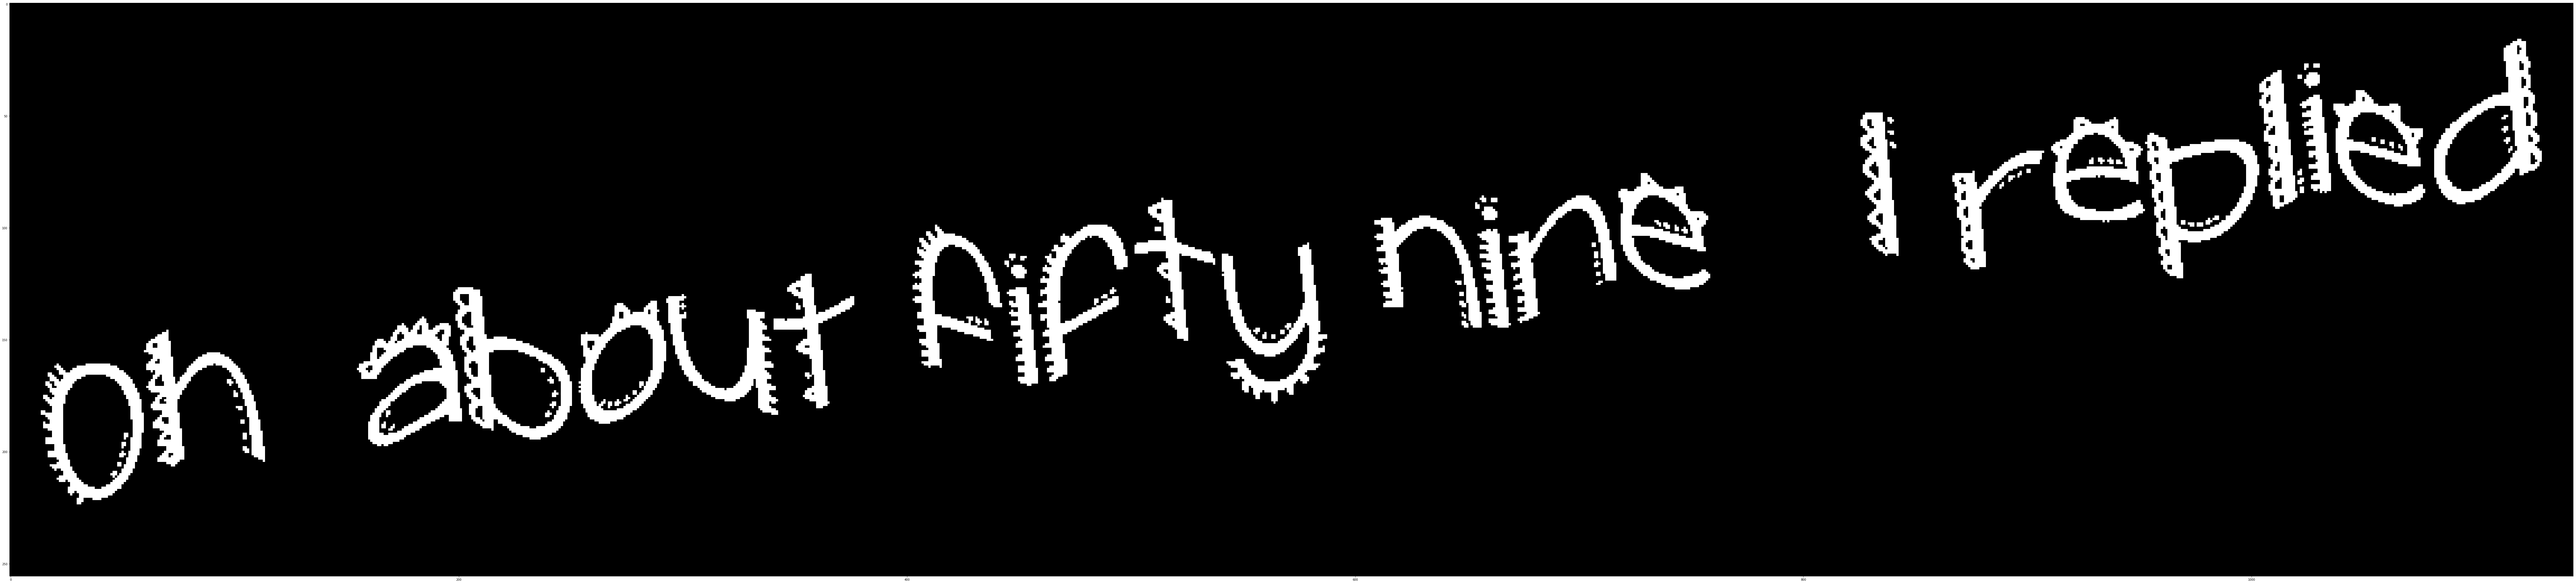

In [132]:
# PRODJEM KROZ SVAKU GRANICU I BOJU I VIDIM KOJA IMA NAJMANJI PROCENAT
# BELIH PIKSELA, I VEROVATNO JE ONA NAJBOLJE URADILA ODABIR SLOVA
best_percent = 0
best_mask = None
for border in possible_borders:
    temp_mask = cv2.inRange(hsv,border[0],border[1])
    percent_white_pixel = get_percents_for_white_and_black_pixels(img, temp_mask)
    print("\t\t\t"+(str(percent_white_pixel)) +"%")
    if percent_white_pixel > best_percent and percent_white_pixel < 20:
        best_percent = percent_white_pixel
        best_mask = temp_mask
        print("novi best: " + str(best_percent))

if best_mask is not None:
    plt.imshow(best_mask,'gray')
    # KASNIJE MOZDA ITERIRATI I VIDETI ZA KOJU KOMBINACIJU DAJE
    # 'DOBRU RECENICU'
else:
    print("nije nasao koristan range")

lower: [  4 100 100] upper: [ 24 255 255]


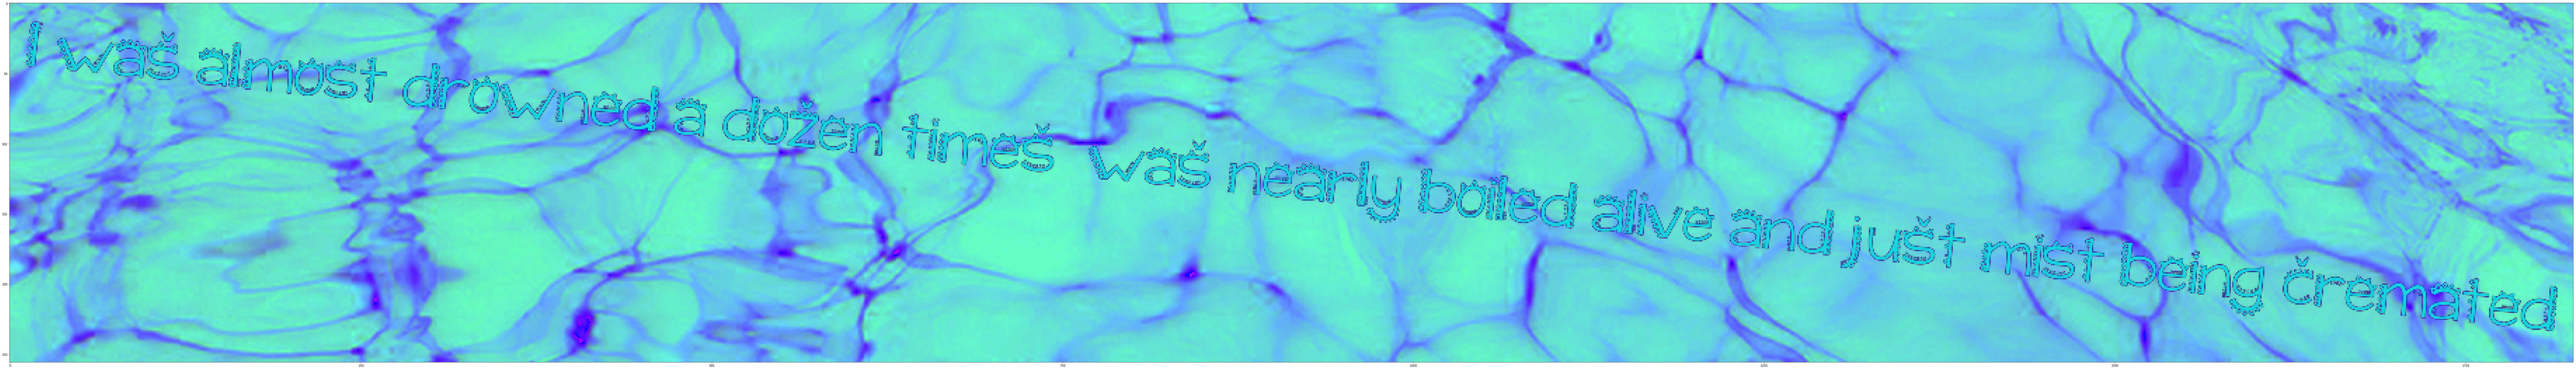

In [56]:
# POKUSAVAM PREKO IN RANGE-A
# KROZ NEKE BOJE KOJE SE CESTO KORISTE PROVUCEM MASKE
# wanted_bgr_color = (100,220,220)
wanted_bgr_color = (110,160,220)
lower,upper = get_limits_for_wanted_color(wanted_bgr_color)
print("lower: " + str(lower) + " upper: " + str(upper))
img = cv2.imread(image_path)
image = img.copy()
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

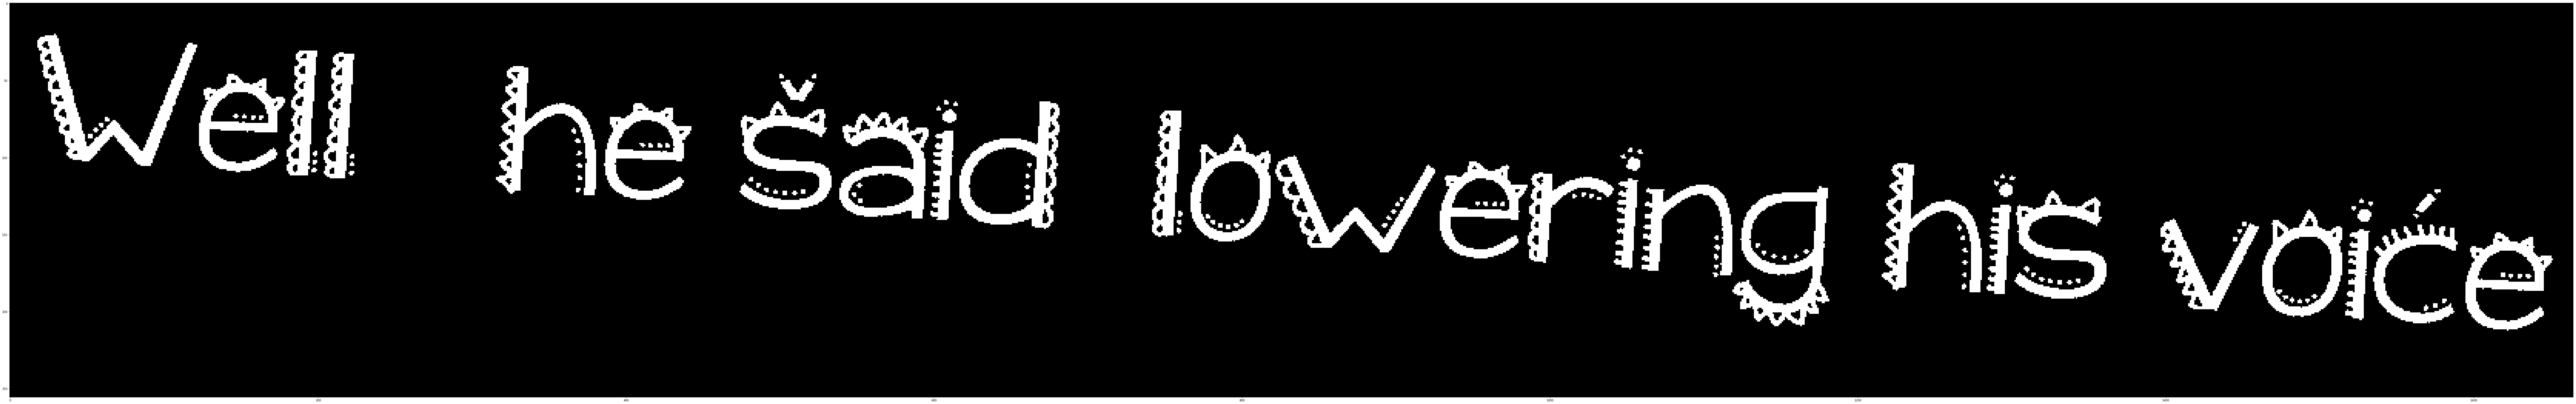

In [48]:
mask1 = cv2.inRange(hsv,lower,upper)
plt.imshow(mask1,'gray')

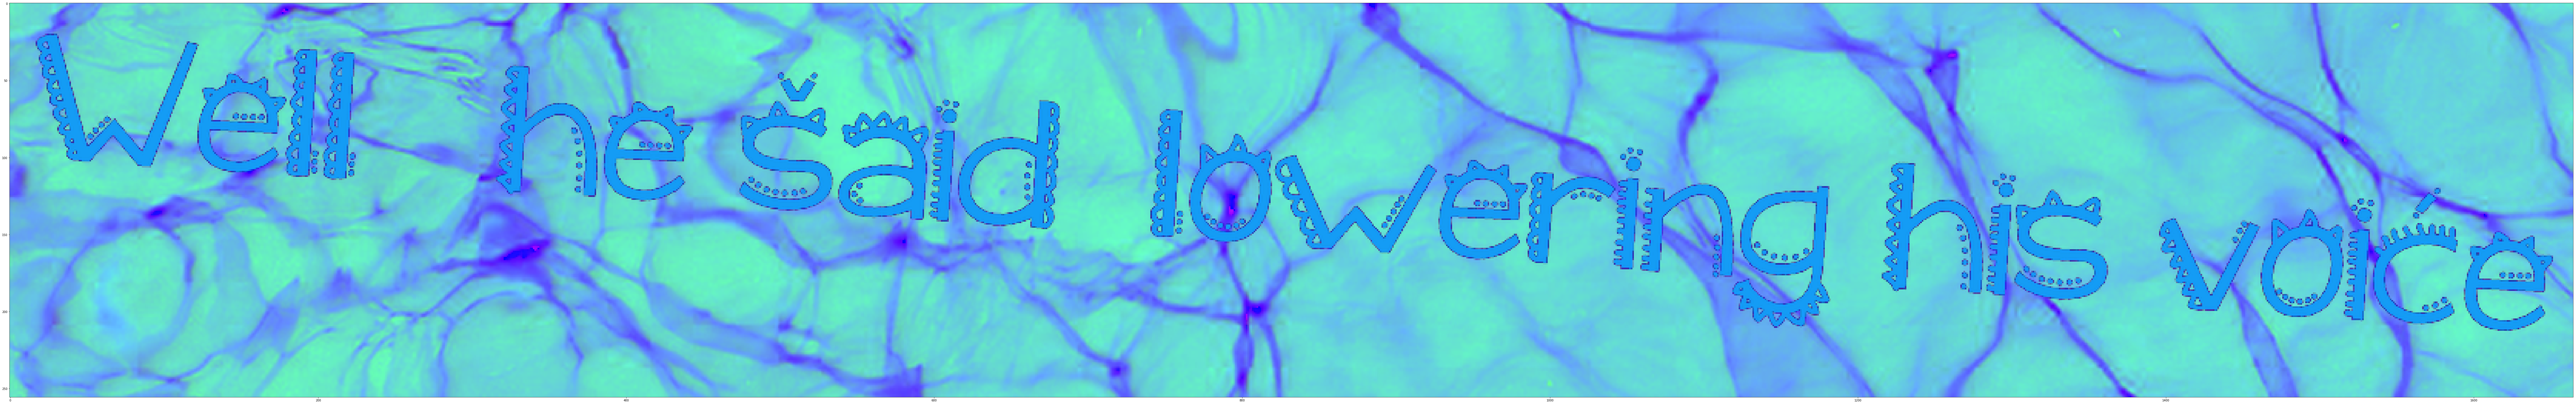

In [49]:
plt.imshow(hsv)

In [ ]:
percent_white_pixel = get_percents_for_white_and_black_pixels(img, mask1)
print("procenat belih: " + str(percent_white_pixel))

In [ ]:
# KRAJ IN RANGE POKUSAJA

In [ ]:
# PREDIKCIJA
print(extract_text(region_distances, sorted_regions, ann,vocabulary))

In [ ]:
plt.rcParams['figure.figsize'] = 2, 2 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno
plot_images(sorted_regions)